In [ ]:
#노트p21  머신러닝 -- 가르쳐주는 학습 (Supervised Learning) -- 분류 (Classification)

In [1]:
import random
import numpy as np 
import matplotlib.pyplot as plt

data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180) ]) #짝수 여자        몸무개 40-70사이   키 140-180사이
    data.append([random.randint(60,90), random.randint(170,200)])  #홀수 남자 
    

- 컴퓨터는 군집화를 2개로 나눔 - 여자 남자 (컴퓨터에게는 2개의 군집화 그룹)

In [10]:
# 여자             출력결과: [몸무게,키]
#data[0:100:2]                                     # 0번째 방부터 100번째 방앞까지 사이  2칸씩 증가   0번째,2번째,4번째..방
for female in data[0:100:2]:
    print(female,end=" ")
print("\n--------------------------------------------")

# 남자
#data[1:100:2]    #170에서 200사이
for male in data[1:100:2]:
    print(male,end=" ")

[56, 150] [48, 175] [68, 157] [46, 157] [65, 158] [57, 149] [53, 140] [68, 147] [60, 168] [56, 145] [60, 140] [52, 165] [61, 168] [68, 164] [69, 163] [42, 178] [49, 180] [63, 165] [44, 178] [46, 164] [52, 140] [52, 153] [42, 159] [55, 166] [49, 152] [42, 145] [70, 143] [50, 152] [51, 160] [69, 152] [66, 166] [59, 162] [63, 177] [70, 162] [69, 143] [50, 161] [44, 156] [50, 180] [45, 175] [65, 168] [44, 145] [52, 161] [41, 178] [47, 155] [41, 146] [47, 158] [53, 171] [63, 144] [46, 141] [49, 148] 
--------------------------------------------
[66, 189] [82, 177] [71, 186] [71, 186] [61, 170] [88, 196] [81, 171] [85, 182] [85, 198] [89, 174] [70, 180] [66, 188] [83, 177] [76, 198] [79, 186] [65, 199] [80, 188] [90, 174] [72, 193] [90, 187] [78, 194] [73, 198] [69, 178] [64, 178] [77, 191] [82, 182] [83, 172] [71, 174] [79, 180] [77, 194] [87, 173] [79, 174] [72, 170] [72, 175] [67, 182] [79, 182] [80, 193] [84, 196] [74, 187] [88, 200] [64, 195] [80, 183] [68, 198] [75, 200] [60, 178] [72,

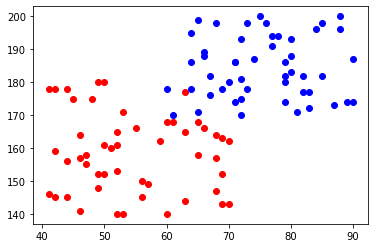

In [12]:
# 여자 몸무게
[d[0]for d in data[0:100:2]]           #d[0]을 for문 앞에다

# 여자 키 
[d[1] for d in data[0:100:2]]

# 남자 몸무게
[d[0]for d in data[1:100:2]]   

# 남자 키 
[d[1]for d in data[1:100:2]]   

plt.plot(  [d[0]for d in data[0:100:2]] ,  [d[1] for d in data[0:100:2]] ,'o', color='r'  )  #여자 몸무개 키
plt.plot(  [d[0]for d in data[1:100:2]] ,   [d[1]for d in data[1:100:2]] ,'o', color='b'  )  #남자 몸무개 키

In [21]:
# 초기 랜덤 지점 2개             
random_points = [[random.randint(40,90),  random.randint(140,200)],     # 두 그룹을 만들기 위해 점2개 ********** 컴퓨터는 이를 한개의 그룹이라고 생각
                  [random.randint(40,90),  random.randint(140,200)]   ]  # 남여 '몸무개'range,  '키'range
print('초기 랜덤 기준점:', random_points)

초기 랜덤 기준점: [[82, 148], [86, 187]]


In [19]:
# 기준점1
print(random_points[0][0], random_points[0][1], end=' / ')            
                                                                     

# 기준점2
print(random_points[1][0], random_points[1][1])

        #기준점 x좌표,      기준점 y 좌표 

84 193 / 80 142


- '컴퓨터'가 '군집화'하는 과정

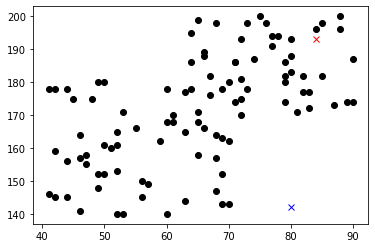

In [20]:
#컴퓨터가 '군집화'하는 과정
for x in data:
    plt.plot(x[0], x[1], 'o', color="k")            #x축: 몸무개 == x[0],     y축: 키 ==x[1]
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r' )  # 기준점 1
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b' )  # 기준점 2              


In [25]:
# 두 영역으로 나눌 빈 리스트 생성         (중앙값을 만들어서 또 그룹핑)
group1 = []
group2 = []

In [ ]:
# 영역을 나누기 위해 두 점 사이의 거리를 구하는 함수   두점[0,0],[3,4]    삼각형 수학식

#### 피타고라스 수학식

In [22]:
def dist(a,b):
    return np.sqrt(    (a[0]-b[0])**2   +   (a[1]-b[1])**2   )           #sqrt는 '루트'를 씌우는 함수

In [23]:
a = [0,0]; b=[3,4]
dist(a,b)

5.0

In [26]:
for d in data:
    if dist(random_points[0],d) <  dist(random_points[1],d): # '빨간점'과 'd'랑 비교    '파랑점'과'd'랑 비교 
        group1.append(d)  #  빨간점과의 거리 < 파랑점과의 거리 (즉 '빨간점과 더 가까운 그룹')                                                                  
    else:
        group2.append(d)  #파란점과 더 가까운 그룹

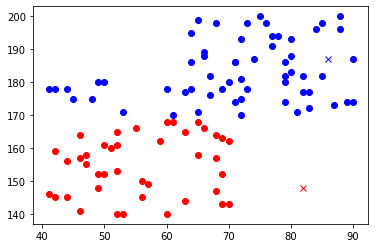

In [27]:
# 새로운 영역과 랜덤점 그래프 
for d in group1:
    plt.plot(d[0],d[1],'o',color='r')
for d in group2:
    plt.plot(d[0],d[1],'o', color='b')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r' )  # 기준점 1
plt.plot(random_points[1][0], random_points[1][1], 'x', color='b' )  # 기준점 2   
    

In [30]:
# 기준점 이동
sumX = 0; sumY=0
for g in group1: #group1은 빨간 점들
    sumX += g[0] # x축값들 누적
    sumY += g[1] # y축값들 누적 
    
# 새로운 기준점1 
new_points = []
new_points.append([sumX/len(group1), sumY/len(group1)])
sumX = 0; sumY=0;

for g in group2:  #group1는 파란 점들
    sumX += g[0] # x축값들 누적
    sumY += g[1] # y축값들 누적
new_points.append([sumX/len(group2), sumY/len(group2)])
print(random_points)
print(new_points)



[[82, 148], [86, 187]]
[[55.90243902439025, 154.58536585365854], [71.32203389830508, 183.22033898305085]]


- 중간 기준점

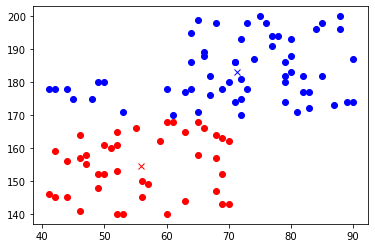

In [31]:
# 새로운 영역과 랜덤점 그래프 
for d in group1:
    plt.plot(d[0],d[1],'o',color='r')
for d in group2:
    plt.plot(d[0],d[1],'o', color='b')
plt.plot(new_points[0][0], new_points[0][1], 'x', color='r' )  # 기준점 1
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b' )  # 기준점 2   

- 기준점을 random_points에서 --> new_points로 바꿈

In [35]:
# 두 영역으로 나눌 빈 리스트 생성        
group1 = []
group2 = []

for d in data:
    if dist(new_points[0],d) <  dist(new_points[1],d): # '빨간점'과 'd'랑 비교    '파랑점'과'd'랑 비교 
        group1.append(d)  #  빨간점과의 거리 < 파랑점과의 거리 (즉 '빨간점과 더 가까운 그룹')                                                                  
    else:
        group2.append(d)  #파란점과 더 가까운 그룹

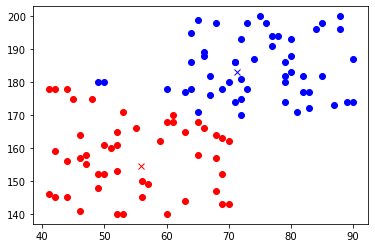

In [36]:
# 새로운 영역과 랜덤점 그래프 
for d in group1:
    plt.plot(d[0],d[1],'o',color='r')
for d in group2:
    plt.plot(d[0],d[1],'o', color='b')
plt.plot(new_points[0][0], new_points[0][1], 'x', color='r' )  # 기준점 1
plt.plot(new_points[1][0], new_points[1][1], 'x', color='b' )  # 기준점 2   

In [ ]:
# 위 그래프 빨간점이 더 많아짐 

#### 전체코드 (최종)

In [38]:
import random
import numpy as np 
import matplotlib.pyplot as plt

def dist(a,b):
    return np.sqrt(    (a[0]-b[0])**2   +   (a[1]-b[1])**2   )     

data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,180) ]) #짝수 여자        몸무개 40-70사이   키 140-180사이
    data.append([random.randint(60,90), random.randint(170,200)])  #홀수 남자 
new_points = [ [random.randint(40,90), random.randint(140,200) ],
                [random.randint(40,90), random.randint(140,200) ] ]    
print('초기 기준점:', new_points)

for i in range(1,11): #1부터 10까지 
    group1 = []
    group2 = []
    for d in data:
        if dist(new_points[0],d)  < dist(new_points[1],d):      # 빨간점 < 파란점 
            group1.append(d)  #빨간점과 가까운 그룹 
        else:
            group2.append(d) #파란점과 가까운 그룹 
            
            
    # group1과 group2의 중간지점을 새로운 기준점 
    sumX=0; sumY=0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    new_points = []
    new_points.append([sumX/len(group1), sumY/len(group1)])

    
    sumX=0; sumY=0
    for g in group2:
        sumX += g[0]
        sumY += g[1]
    #new_points = []   이거 없애야. 아니면 첫번째 기준점 날라감 
    new_points.append([sumX/len(group2), sumY/len(group2)])
    print(i,'번째 기준:', new_points)


초기 기준점: [[48, 196], [60, 183]]
1 번째 기준: [[60.0, 197.0], [66.71717171717172, 172.43434343434345]]
2 번째 기준: [[73.78571428571429, 193.71428571428572], [65.48837209302326, 169.25581395348837]]
3 번째 기준: [[78.65714285714286, 188.05714285714285], [60.184615384615384, 164.4]]
4 번째 기준: [[77.83673469387755, 184.40816326530611], [55.90196078431372, 161.41176470588235]]
5 번째 기준: [[77.31372549019608, 184.09803921568627], [55.55102040816327, 160.79591836734693]]
6 번째 기준: [[77.31372549019608, 184.09803921568627], [55.55102040816327, 160.79591836734693]]
7 번째 기준: [[77.31372549019608, 184.09803921568627], [55.55102040816327, 160.79591836734693]]
8 번째 기준: [[77.31372549019608, 184.09803921568627], [55.55102040816327, 160.79591836734693]]
9 번째 기준: [[77.31372549019608, 184.09803921568627], [55.55102040816327, 160.79591836734693]]
10 번째 기준: [[77.31372549019608, 184.09803921568627], [55.55102040816327, 160.79591836734693]]


In [ ]:
# 5번째 기준에서부터 계속 한 군데에 있다 ==> 군집합이 끝났다는 뜻 

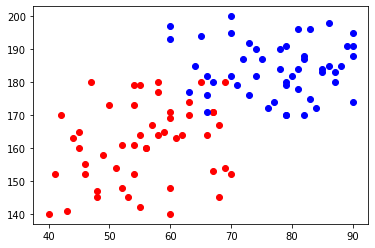

In [39]:
#여자 몸무게 
[d[0] for d in data[0:100:2]]   

# 여자 키 
[d[1] for d in data[0:100:2]] 

#남자 몸무게 
[d[0] for d in data[1:100:2]]   

# 남자 키 
[d[1] for d in data[1:100:2]] 

 # x좌표:여자 몸무개  y좌표:여자 키 
plt.plot( [d[0] for d in data[0:100:2]] , [d[1] for d in data[0:100:2]],'o',color='r')

 # x좌표:남자 몸무개  y좌표:남자 키 
plt.plot( [d[0] for d in data[1:100:2]] , [d[1] for d in data[1:100:2]],'o',color='b')


#### 군집화

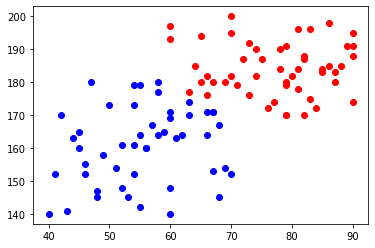

In [40]:
for g in group1:
    plt.plot(g[0],g[1],'o',color='r')
for g in group2:
    plt.plot(g[0],g[1],'o',color='b')

In [ ]:
# 분류는 '답'을 줘야.  예: 이 그룹은 '남'  이 그룹은 '여' . 지금 여기는 '군집합'